In [6]:
!conda install -c conda-forge fbprophet -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt



In [2]:
import pandas as pd
from prophet import Prophet



/Users/heshan/opt/anaconda3/envs/ox/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [27]:
# df1 = pd.read_csv("2000-2012formated.csv",index_col=[0],parse_dates=[0])
# df1.head()
df1 = pd.read_csv("2000-2012formated.csv")
df1=df1.loc[df1['town']=='BEDOK']
df1=df1.loc[df1['flat_type']=='2 ROOM']

# df1[df1['town']=="GEYLANG"]
df1 = df1.drop('town',axis=1)
df1 = df1.drop('flat_type',axis=1)
df1 = df1.drop('block',axis=1)
df1 = df1.drop('street_name',axis=1)
df1 = df1.drop('storey_range',axis=1)
df1 = df1.drop('floor_area_sqm',axis=1)
df1 = df1.drop('flat_model',axis=1)
df1 = df1.drop('lease_commence_date',axis=1)
df1 = df1.drop('remaining_lease',axis=1)
# df1 = pd.read_csv("2000-2012formated.csv",index_col=[0],parse_dates=[0])
df1.head()

,month,resale_price
157,2000-01,120000.0
158,2000-01,96000.0
159,2000-01,126500.0
160,2000-01,118000.0
2537,2000-02,112000.0


In [28]:
df1.to_csv("Bedok2room.csv", encoding='utf-8', index=False)

In [29]:
pjme = pd.read_csv('Bedok2room.csv',
                   index_col=[0],
                  parse_dates=[0])
pjme.head()

,resale_price
month,
2000-01-01,120000.0
2000-01-01,96000.0
2000-01-01,126500.0
2000-01-01,118000.0
2000-02-01,112000.0


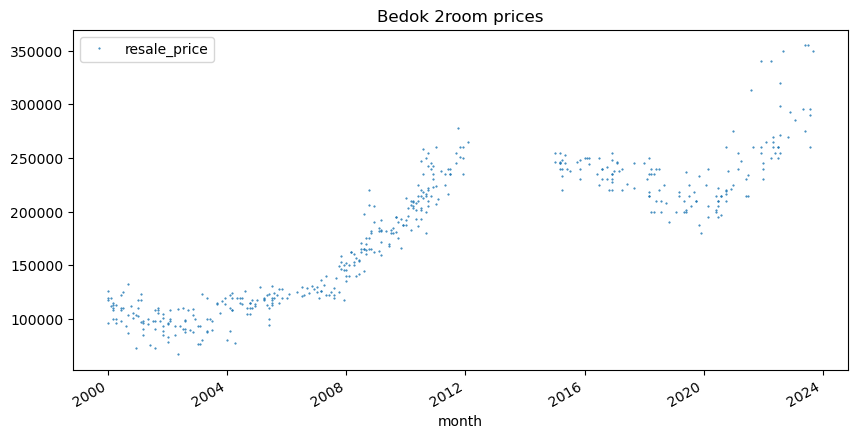

In [30]:
color_pal = sns.color_palette()
pjme.plot(style='.',
          figsize=(10, 5),
          ms=1,
          color=color_pal[0],
          title='Bedok 2room prices')
plt.show()

In [31]:
# df1 = pd.read_csv("2000-2012formated.csv",index_col=[0],parse_dates=[0])
# df1.head()
df1 = pd.read_csv("2000-2023.csv")
df1=df1.loc[df1['town']=='BEDOK']
df1=df1.loc[df1['flat_type']=='2 ROOM']

# df1[df1['town']=="GEYLANG"]
df1 = df1.drop('town',axis=1)
df1 = df1.drop('flat_type',axis=1)
df1 = df1.drop('block',axis=1)
df1 = df1.drop('street_name',axis=1)
df1 = df1.drop('storey_range',axis=1)
df1 = df1.drop('floor_area_sqm',axis=1)
df1 = df1.drop('flat_model',axis=1)
df1 = df1.drop('lease_commence_date',axis=1)
df1 = df1.drop('remaining_lease',axis=1)
# df1 = pd.read_csv("2000-2012formated.csv",index_col=[0],parse_dates=[0])
df1.head()

,month,resale_price
157,2000-01,120000.0
158,2000-01,96000.0
159,2000-01,126500.0
160,2000-01,118000.0
2537,2000-02,112000.0


In [32]:
df1.to_csv("Bedok2roomall.csv", encoding='utf-8', index=False)

In [33]:
pjme = pd.read_csv('Bedok2roomall.csv',
                   index_col=[0],
                  parse_dates=[0])
pjme.head()

,resale_price
month,
2000-01-01,120000.0
2000-01-01,96000.0
2000-01-01,126500.0
2000-01-01,118000.0
2000-02-01,112000.0


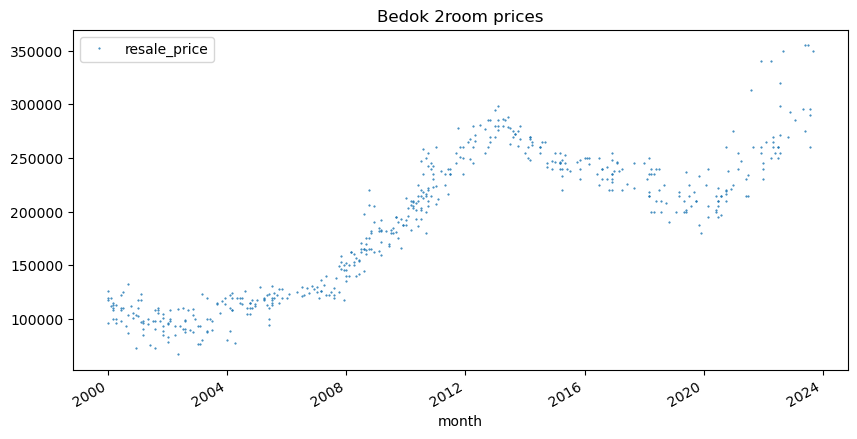

In [34]:
color_pal = sns.color_palette()
pjme.plot(style='.',
          figsize=(10, 5),
          ms=1,
          color=color_pal[0],
          title='Bedok 2room prices')
plt.show()

In [3]:
%pip install prophet

  Using cached prophet-1.1.5-py3-none-macosx_10_9_x86_64.whl (8.8 MB)
  Using cached cmdstanpy-1.2.0-py3-none-any.whl (93 kB)
  Using cached holidays-0.34-py3-none-any.whl (778 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 498.2 kB/s eta 0:00:00a 0:00:01
  Using cached stanio-0.3.0-py3-none-any.whl (6.2 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from fbprophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


ModuleNotFoundError: No module named 'fbprophet'

In [3]:
# df1 = pd.read_csv("2000-2012formated.csv",index_col=[0],parse_dates=[0])
# df1.head()
df4 = pd.read_csv("2000-2023.csv")
df4=df4.loc[df4['town']=='BEDOK']
df4=df4.loc[df4['flat_type']=='2 ROOM']

# df1[df1['town']=="GEYLANG"]
df4 = df4.drop('town',axis=1)
df4 = df4.drop('flat_type',axis=1)
df4 = df4.drop('block',axis=1)
df4 = df4.drop('street_name',axis=1)
df4 = df4.drop('storey_range',axis=1)
df4 = df4.drop('floor_area_sqm',axis=1)
df4 = df4.drop('flat_model',axis=1)
df4 = df4.drop('lease_commence_date',axis=1)
df4 = df4.drop('remaining_lease',axis=1)
# df1 = pd.read_csv("2000-2012formated.csv",index_col=[0],parse_dates=[0])
df4.head()

,month,resale_price
157,2000-01,120000.0
158,2000-01,96000.0
159,2000-01,126500.0
160,2000-01,118000.0
2537,2000-02,112000.0


In [7]:
df5 = pd.read_csv("historyInflationFormated.csv")
df5.head()

,month,Inflation
0,2000-01,0.00913
1,2000-02,0.01268
2,2000-03,0.01226
3,2000-04,0.01111
4,2000-05,0.00516


In [9]:
#merge inflation and relase price
merged_df = pd.merge(df4, df5, on='month')
merged_df

,month,resale_price,Inflation
0,2000-01,120000.0,0.00913
1,2000-01,96000.0,0.00913
2,2000-01,126500.0,0.00913
3,2000-01,118000.0,0.00913
4,2000-02,112000.0,0.01268
...,...,...,...
509,2023-06,355000.0,0.04514
510,2023-07,355000.0,0.04110
511,2023-08,290000.0,0.04041
512,2023-08,296000.0,0.04041


In [11]:
df6 = pd.read_csv("historyCPIFormated.csv")
df6.head()

,month,CPI
0,2000-01,73.942
1,2000-02,74.294
2,2000-03,74.039
3,2000-04,74.146
4,2000-05,73.878


In [12]:
#merge inflation and relase price
merged_df1 = pd.merge(merged_df, df6, on='month')
merged_df1

,month,resale_price,Inflation,CPI
0,2000-01,120000.0,0.00913,73.942
1,2000-01,96000.0,0.00913,73.942
2,2000-01,126500.0,0.00913,73.942
3,2000-01,118000.0,0.00913,73.942
4,2000-02,112000.0,0.01268,74.294
...,...,...,...,...
527,2023-06,355000.0,0.04514,113.576
528,2023-07,355000.0,0.04110,113.309
529,2023-08,290000.0,0.04041,114.303
530,2023-08,296000.0,0.04041,114.303


In [ ]:
X = df [['month','Inflation','CPI']]
if label:
        y = df[label]
        return X, y
    return X